# Exercise 1: Number of disk I/O’s versus processor time

**The number of disk I/O’s and processor times of 7 programs were measured as (14, 2), (16, 5), (27, 7), (42, 9), (83, 20), (50, 13), (39, 10).**

*1. Compute $\bar{x}$, $\bar{y}$ (Slide 9/40); $S_{xy} , S_{xx} , S_{yy}$ (Slide 10/40); $θ_{1} , θ_{0}$ (Slide 9/40)*

\begin{align*}
    \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_{i} &&
    \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_{i} \\
    S_{xx} = \sum_{i=1}^{n}(x_{i} - \bar{x})^2 &&
    S_{xy} = \sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y}) \\
    \theta^{}_{0} = \bar{y} - \theta^{}_{1}\bar{x} &&
    \theta^{}_{1} = \frac{S_{xy}}{S_{xx}}
\end{align*}

In [26]:
import numpy as np
from matplotlib import pyplot as plt

#import pandas as pd

%precision 10
%matplotlib inline

x=np.array([14, 16, 27, 42, 83, 50, 39])
y=np.array([2, 5, 7, 9, 20, 13, 10])

mean_x = np.mean(x)
mean_y = np.mean(y)

Sxx = np.sum((x-mean_x)**2)
Syy = np.sum((y-mean_y)**2)
Sxy = np.sum((x-mean_x)*(y-mean_y))

thet1 = Sxy/Sxx
thet0 = mean_y-thet1*mean_x

print("Mean X: %f \nMean Y: %f \nSxx: %f \nSyy: %f \nSxy: %f \nTheta0: %f \nTheta1: %f" %(mean_x, mean_y, Sxx, Syy, Sxy, thet0, thet1))


Mean X: 38.714286 
Mean Y: 9.428571 
Sxx: 3363.428571 
Syy: 205.714286 
Sxy: 819.857143 
Theta0: -0.008282 
Theta1: 0.243756


*2. Draw the data points together with the regression line.*

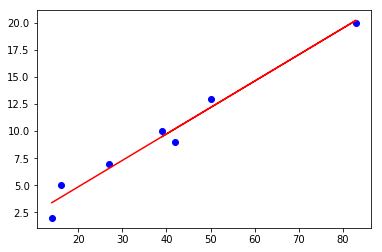

In [27]:
plt.plot(x,y, 'bo')
plt.plot(x,thet0+thet1*x, 'r')
plt.show()

*3. Compute the sum of squared errors SSE using the formula on the bottom of Slide 11/40 and compare it with the value obtained with the formula on the top of slide 19/40.*

**Slide 11**

\begin{align*}
    SSE = \sum_{i=1}^{n}(e_{i})^2 = \sum_{i=1}^{n}[(y_{i}-\bar{y})-\theta^{}_{1}(x_{i}-\bar{x})]^2
\end{align*}

In [28]:
SSe = np.sum(((y-mean_y)-thet1*(x-mean_x))**2)
print("SSE: " + str(SSe))

SSE: 5.868883792048932


**Slide 19**
\begin{align*}
    SSE = \sum_{i=1}^{n}(y_{i})^2-\theta^{}_{0}\sum_{i=1}^{n}(y_{i})-\theta^{}_{1}\sum_{i=1}^{n}(x_{i}y_{i})
\end{align*}

In [29]:
Sse = np.sum(y**2)-thet0*np.sum(y)-thet1*np.sum(x*y)
print("SSE: " + str(Sse))

SSE: 5.868883792048905


*4. Compute the Pearson correlation coefficient $r$ using the sample variances $s^2_{x}$ and $s^2_{y}$ as well as the sample covariance $s_{xy}$ (slide 16/40). Make sure You understand the difference between $S_{xy}$ and $s_{xy}$!*

\begin{align*}
    r = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^2}}
\end{align*}

In [30]:
r = (np.sum((x-mean_x)*(y-mean_y)))/(np.sqrt((np.sum((x-mean_x)**2)))*np.sqrt((np.sum((y-mean_y)**2))))
print("r: " + str(r))

r: 0.9856321341091975


$S_{xy}$ = Summed up deviation from the mean of all points (x AND y) 

$s_{xy}$ = Area, in which all points reside in

*5. Again compute SSE using the first term in the formula in the middle of slide 13/40. Compute the sum of squares explained by regression SSR which is the last term in the same formula. Then compute the total sum of squares SST and the coefficient of determination or R-squared $R^2$(slide 14/40) as well as the mean square error MSE (slide 19/40).*

\begin{align*}
    SSE = \sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2
\end{align*}
\begin{align*}
    SSR = \sum_{i}^{n}(\hat{y}_{i}-\bar{y})^2
\end{align*}
\begin{align*}
    SST = SSE+SSR
\end{align*}


\begin{align*}
    R^2 = \frac{SSR}{SST}
\end{align*}

In [31]:
hat_y = thet0+thet1*x

SSE=np.sum(((y-hat_y))**2)
print("SSE: " + str(SSE))

SSR=np.sum((hat_y-mean_y)**2)
print("SSR: " + str(SSR))

SST = SSE + SSR
print("SST: " + str(SST))

R_sq = SSR/SST
print("R^2: " + str(R_sq))

SSE: 5.868883792048929
SSR: 199.84540192223682
SST: 205.71428571428575
R^2: 0.971470703788651


*6. Give a 90 % confidence interval for $θ_{0}$ and $θ_{1}$ (slide 20/40).*

\begin{align*}
    s_{\theta^{}_{0}} = \sqrt{MSE}\left[\frac{1}{n}+\frac{\bar{x}^2}
    {\sum_{i=1}^{n}(x_{i}^2)-n\bar{x}^2}\right]^{1/2}
\end{align*}
\begin{align*}
    s_{\theta^{}_{1}} = \frac{\sqrt{MSE}}{[\sum_{1}^{n}(x_{i}^{2})- n\bar{x}^2]^{1/2}}
\end{align*}

In [32]:
thet0 = np.sqrt(0.9)*((1/len(x))+((mean_x**2)/(np.sum(x**2)-len(x)*mean_x**2)))**0.5
print("S0_0: " + str(thet0))

thet1 = (np.sqrt(0.9))/((np.sum(x**2)-len(x)*mean_x**2))**0.5
print("S0_1: " + str(thet1))

S0_0: 0.7277536549293291
S0_1: 0.016357997978338524


 # Exercise 2: Skin Cancer Mortality vs. State Latitute (US, 1950)

Repeat the process from Exercise 1 using the data in file SkinCancerMortalityUSA1950.txt.
In particular we are interested whether there is a linear relationship between the mortality and
the latitute of a US-state (slide 22/40).

# Exercise 3: Standardization

Repeat exercise 1 but this time using standarized variables (slide 24/40). You only need to scale
the variables before You start the computations!

Mean of X: See Ex. 1a: **38.714286**

Standard Deviation:

\begin{align*}
\delta^{}_{x} = s_{x} = \frac{1}{n-1}\sum_{i=1}^{n}(x_{i} - \bar{x})^2
\end{align*}

In [33]:
sx = (1/(len(x)-1))*(np.sum(x-mean_x)**2)
print("Standard deviation sx: " + str(sx))

Standard deviation sx: 8.414516322357459e-30


Standardized variable $\widetilde{x}$

\begin{align*}
\widetilde{x}= \frac{1}{s_{x}}(x-\bar{x})
\end{align*}

In [34]:
stand_x = (1/sx)*(x-mean_x)
print("Mean of standardized X: " + str(np.mean(stand_x)))
print("Standard deviation of standardized X: " + str((1/(len(stand_x)-1))*(np.sum(stand_x-np.mean(stand_x))**2)))

Mean of standardized X: 80421421917330.28
Standard deviation of standardized X: 3.900800644623203e+28


# Exercise 4: Multiple Linear Regression

Repeat and try to understand the computations on slide 30/40. In particular You must be able to
build matrix **X** and write down the (overdetermined) system of equations on slide 29/40.